<a href="https://colab.research.google.com/github/Bladimir0005/Entregable/blob/main/07MIAR_Proyecto_Programacion(Grupo_1_B).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 07MIAR - Redes Neuronales y Deep Learning: Proyecto de programación "*Deep Vision in classification tasks*"


## Enunciado

En esta actividad, el alumno debe **evaluar y comparar dos estrategias** para la **clasificación de imágenes** empleando el **dataset asignado**. El/La alumnx deberá resolver el reto proponiendo una solución válida **basada en aprendizaje profundo**, más concretamente en redes neuronales convolucionales (**CNNs**). Será indispensable que la solución propuesta siga el **pipeline visto en clase** para resolver este tipo de tareas de inteligencia artificial:

1.   **Carga** del conjunto de datos
2.   **Inspección** del conjunto de datos
3.   **Acondicionamiento** del conjunto de datos
4.   Desarrollo de la **arquitectura** de red neuronal y **entrenamiento** de la solución
5.   **Monitorización** del proceso de **entrenamiento** para la toma de decisiones
6.   **Evaluación** del modelo predictivo y planteamiento de la siguiente prueba experimental

### Estrategia 1: Entrenar desde cero o *from scratch*

La primera estrategia a comparar será una **red neuronal profunda** que el **alumno debe diseñar, entrenar y optimizar**. Se debe **justificar empíricamente** las decisiones que llevaron a la selección de la **arquitectura e hiperparámetros final**. Se espera que el alumno utilice todas las **técnicas de regularización** mostradas en clase de forma justificada para la mejora del rendimiento de la red neuronal (*weight regularization*, *dropout*, *batch normalization*, *data augmentation*, etc.).

### Estrategia 2: Red pre-entrenada

La segunda estrategia a comparar debe incluir la utilización de una **red preentrenada** con el dataset ImageNet, llevando a cabo tareas de ***transfer learning*** y ***fine-tuning*** para resolver la tarea de clasificación asignada. Deben **compararse al menos dos tipos de arquitecturas** (VGGs, ResNet50, Xception, InceptionV3, InceptionResNetV2, MobileNetV2, DenseNet, ResNet) y se debe **seleccionar la que mayor precisión proporcione** (información sobre las arquitecturas disponibles en https://keras.io/applications/). Se espera que el/la alumnx utilice todas las **técnicas de regularización** mostradas en clase de forma justificada para la mejora del rendimiento de la red neuronal (*weight regularization*, *dropout*, *batch normalization*, *data augmentation*, etc.).

## Normas a seguir

- Será **indispensable** realizar el **trabajo por parejas**. Dichas parejas de alumnxs se generarán **de manera automática** teniendo en cuenta el pais de residencia con el objetivo de facilitar el trabajo en equipo.  
- Se debe entregar un **ÚNICO FICHERO PDF POR ALUMNO** que incluya las instrucciones presentes en el Colab Noteboook y su **EJECUCIÓN!!!**. Debe aparecer todo el proceso llevado a cabo en cada estrategia (i.e. carga de datos, inspección de datos, acondicionamiento, proceso de entrenamiento y proceso de validación del modelo).
- **La memoria del trabajo** (el fichero PDF mencionado en el punto anterior) deberá **subirla cada integrante del grupo** (aunque se trate de un documento idéntico) a la actividad que se habilitará **en CampusVIU**.
- Se recomienda trabajar respecto a un directorio base (**BASE_FOLDER**) para facilitar el trabajo en equipo. En este notebook se incluye un ejemplo de cómo almacenar/cargar datos utilizando un directorio base.
- Las **redes propuestas** deben estar **entrenadas** (y **EVIDENCIAR este proceso en el documento PDF**). La entrega de una **red sin entrenar** supondrá **perdida de puntos**.
- Si se desea **evidenciar alguna métrica** del proceso de entrenamiento (precisión, pérdida, etc.), estas deben ser generadas.
- Todos los **gráficos** que se deseen mostrar deberán **generarse en el Colab Notebook** para que tras la conversión aparezcan en el documento PDF.

## *Tips* para realizar la actividad con éxito
- Los **datos** se cargarán directamente **desde** la plataforma **Kaggle** mediante su API (https://github.com/Kaggle/kaggle-api). En este Notebook se incluye un ejemplo de como hacerlo. Se recomienda generar una función que aborde esta tarea.
- El **documento PDF a entregar** como solución de la actividad se debe **generar automáticamente desde el fichero ".ipynb"**. En este Notebook se incluye un ejemplo de como hacerlo.
- **Generar secciones y subsecciones en el Colab Notebook** supondrá que el documento **PDF generado** queda totalmente **ordenado** facilitando la evaluación al docente.
- Se recomienda encarecidamente **incluir comentarios concisos pero aclaratorios**.
- Es muy recomendable crear una **última sección** de texto en el Colab Notebook en la que se discutan los diferentes modelos obtenidos y se extraigan las conclusiones pertinentes.

## Criterios de evaluación

- **Seguimiento** de las **normas establecidas** en la actividad (detalladas anteriormente).
- Creación de una **solución que resuelva la tarea de clasificación**, i.e. que las figuras de mérito empleadas para medir la bondad del modelo predictivo evidencien un *performance* superior al rendimiento estocástico.
- **Claridad** en la creación de la solución, en las justificaciones sobre la toma de decisiones llevada a cabo así como en las comparativas y conclusiones finales.
- **Efectividad** al presentar las comparaciones entre métricas de evaluación de ambas estrategias.
- **Demostración** de la utilización de **técnicas de regularización** para mejorar el rendimiento de los modelos.

## Estrategia 2

In [ ]:
# Celda 1: Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

# --- ¡IMPORTANTE! ---
# Define una carpeta base en tu Google Drive donde se guardará todo.
# Puedes crear esta carpeta manualmente en tu Drive si aún no existe.
BASE_FOLDER = "/content/drive/MyDrive/Proyecto_Redes_Neuronales/"

# Nos aseguramos de que la carpeta exista, si no, la creamos.
import os
os.makedirs(BASE_FOLDER, exist_ok=True)
print(f"Carpeta de trabajo configurada en: {BASE_FOLDER}")

Mounted at /content/drive
Carpeta de trabajo configurada en: /content/drive/MyDrive/Proyecto_Redes_Neuronales/


In [ ]:
# Celda 2: Subir y configurar el token de Kaggle
!pip install -q kaggle # Instala la librería de Kaggle

from google.colab import files
print("Por favor, sube el archivo 'kaggle.json' que descargaste de tu cuenta de Kaggle.")
files.upload()

# Movemos el token a la carpeta que Kaggle espera
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json # Damos los permisos adecuados al archivo

print("\n¡Configuración de la API de Kaggle completada!")

Por favor, sube el archivo 'kaggle.json' que descargaste de tu cuenta de Kaggle.


Saving kaggle.json to kaggle.json

¡Configuración de la API de Kaggle completada!


In [ ]:
# Celda 3: Descargar y descomprimir los datos
# Usaremos el dataset 'dogs-vs-cats-redux-kernels-edition' como se recomienda.
COMPETITION_NAME = 'dogs-vs-cats-redux-kernels-edition'

print(f"Descargando el dataset: {COMPETITION_NAME}...")
!kaggle competitions download -c {COMPETITION_NAME}

# Creamos un directorio para organizar los datos originales
RAW_DATA_DIR = 'raw_data'
os.makedirs(RAW_DATA_DIR, exist_ok=True)

# Descomprimimos el archivo principal
print("\nDescomprimiendo archivo principal...")
!unzip -q {COMPETITION_NAME}.zip -d {RAW_DATA_DIR}

# Los datos de entrenamiento y prueba suelen venir en otros zips anidados.
# Vamos a descomprimirlos también.
print("Descomprimiendo 'train.zip' y 'test.zip'...")
if os.path.exists(f'{RAW_DATA_DIR}/train.zip'):
  !unzip -q {RAW_DATA_DIR}/train.zip -d {RAW_DATA_DIR}
if os.path.exists(f'{RAW_DATA_DIR}/test.zip'):
  !unzip -q {RAW_DATA_DIR}/test.zip -d {RAW_DATA_DIR}

print(f"\n¡Datos listos! Contenido de la carpeta '{RAW_DATA_DIR}':")
!ls {RAW_DATA_DIR}

Descargando el dataset: dogs-vs-cats-redux-kernels-edition...
 98% 799M/814M [00:08<00:00, 271MB/s]
100% 814M/814M [00:08<00:00, 100MB/s]

Descomprimiendo archivo principal...
Descomprimiendo 'train.zip' y 'test.zip'...

¡Datos listos! Contenido de la carpeta 'raw_data':
sample_submission.csv  test  test.zip  train  train.zip


In [ ]:
# Celda 4: Crear la estructura de directorios y dividir los datos
import shutil
import random
import os

print("Iniciando la estructuración de directorios...")

# Directorio donde están las imágenes originales ('train' dentro de 'raw_data')
# Asumimos que la Celda 3 se ejecutó y creó la carpeta 'raw_data'
SOURCE_DIR = os.path.join('raw_data', 'train')

# Verificación rápida
if not os.path.isdir(SOURCE_DIR):
    raise FileNotFoundError(f"No existe el directorio de origen: {SOURCE_DIR}. Asegúrate de haber ejecutado la celda 3.")

# Directorio base donde crearemos la nueva estructura
STRUCTURED_DATA_DIR = 'data_structured'

# Nombres para los subconjuntos
TRAIN_DIR = os.path.join(STRUCTURED_DATA_DIR, 'train')
VALIDATION_DIR = os.path.join(STRUCTURED_DATA_DIR, 'validation')
TEST_DIR = os.path.join(STRUCTURED_DATA_DIR, 'test')

# Proporciones de la división (70% entrenamiento, 15% validación, 15% prueba)
TRAIN_SPLIT = 0.7
VALIDATION_SPLIT = 0.15

# Nombres de las clases (Keras los usará como etiquetas)
CLASSES = ['cat', 'dog']

# --- Creación de la estructura de carpetas ---
if os.path.exists(STRUCTURED_DATA_DIR):
    shutil.rmtree(STRUCTURED_DATA_DIR)  # Borra la carpeta si ya existe para empezar de cero

os.makedirs(STRUCTURED_DATA_DIR, exist_ok=True)

# CORRECCIÓN: definir split_dirs correctamente
split_dirs = [TRAIN_DIR, VALIDATION_DIR, TEST_DIR]
for split_dir in split_dirs:
    os.makedirs(split_dir, exist_ok=True)
    for cls in CLASSES:
        os.makedirs(os.path.join(split_dir, cls), exist_ok=True)

# --- Lógica para dividir y copiar los archivos ---
# Tomamos solo archivos (ignorando subdirectorios ocultos, etc.)
all_filenames = [f for f in os.listdir(SOURCE_DIR)
                 if os.path.isfile(os.path.join(SOURCE_DIR, f))]

# Reproducibilidad (opcional)
random.seed(42)
random.shuffle(all_filenames)

for cls in CLASSES:
    # Filtramos los archivos que pertenecen a la clase actual
    # Asume nombres tipo 'cat_0001.jpg' o que empiezan con 'cat'/'dog'
    class_filenames = [fname for fname in all_filenames if fname.lower().startswith(cls)]

    # Calculamos los puntos de corte para la división
    n = len(class_filenames)
    train_end = int(n * TRAIN_SPLIT)
    validation_end = int(n * (TRAIN_SPLIT + VALIDATION_SPLIT))

    # Dividimos la lista de archivos
    train_files = class_filenames[:train_end]
    validation_files = class_filenames[train_end:validation_end]
    test_files = class_filenames[validation_end:]

    # Función interna para copiar archivos y evitar repetir código
    def copy_files(files, dest_folder):
        for fname in files:
            src = os.path.join(SOURCE_DIR, fname)
            dst = os.path.join(dest_folder, cls, fname)
            shutil.copy(src, dst)

    # Copiamos los archivos a sus carpetas correspondientes
    copy_files(train_files, TRAIN_DIR)
    copy_files(validation_files, VALIDATION_DIR)
    copy_files(test_files, TEST_DIR)

print("\n¡Estructura de directorios creada exitosamente!")
for cls in CLASSES:
    print(f"Imágenes de entrenamiento para '{cls}': {len(os.listdir(os.path.join(TRAIN_DIR, cls)))}")
    print(f"Imágenes de validación para '{cls}': {len(os.listdir(os.path.join(VALIDATION_DIR, cls)))}")
    print(f"Imágenes de prueba para '{cls}': {len(os.listdir(os.path.join(TEST_DIR, cls)))}")


Iniciando la estructuración de directorios...

¡Estructura de directorios creada exitosamente!
Imágenes de entrenamiento para 'cat': 8750
Imágenes de validación para 'cat': 1875
Imágenes de prueba para 'cat': 1875
Imágenes de entrenamiento para 'dog': 8750
Imágenes de validación para 'dog': 1875
Imágenes de prueba para 'dog': 1875



--- Iniciando entrenamiento para: VGG16 ---
Found 17500 images belonging to 2 classes.
Found 3750 images belonging to 2 classes.

--- Fase 1: Extracción de Características ---
Epoch 1/2
547/547 ━━━━━━━━━━━━━━━━━━━━ 310s 561ms/step - accuracy: 0.6988 - loss: 1.2511 - val_accuracy: 0.9496 - val_loss: 0.1473
Epoch 2/2
547/547 ━━━━━━━━━━━━━━━━━━━━ 300s 549ms/step - accuracy: 0.8976 - loss: 0.3130 - val_accuracy: 0.9616 - val_loss: 0.1150

--- Fase 2: Ajuste Fino ---
Epoch 1/2
547/547 ━━━━━━━━━━━━━━━━━━━━ 451s 745ms/step - accuracy: 0.9458 - loss: 0.1413 - val_accuracy: 0.9907 - val_loss: 0.0281
Epoch 2/2
547/547 ━━━━━━━━━━━━━━━━━━━━ 374s 683ms/step - accuracy: 0.9758 - loss: 0.0594 - val_accuracy: 0.9883 - val_loss: 0.0306
--- Entrenamiento para VGG16 completado. ---


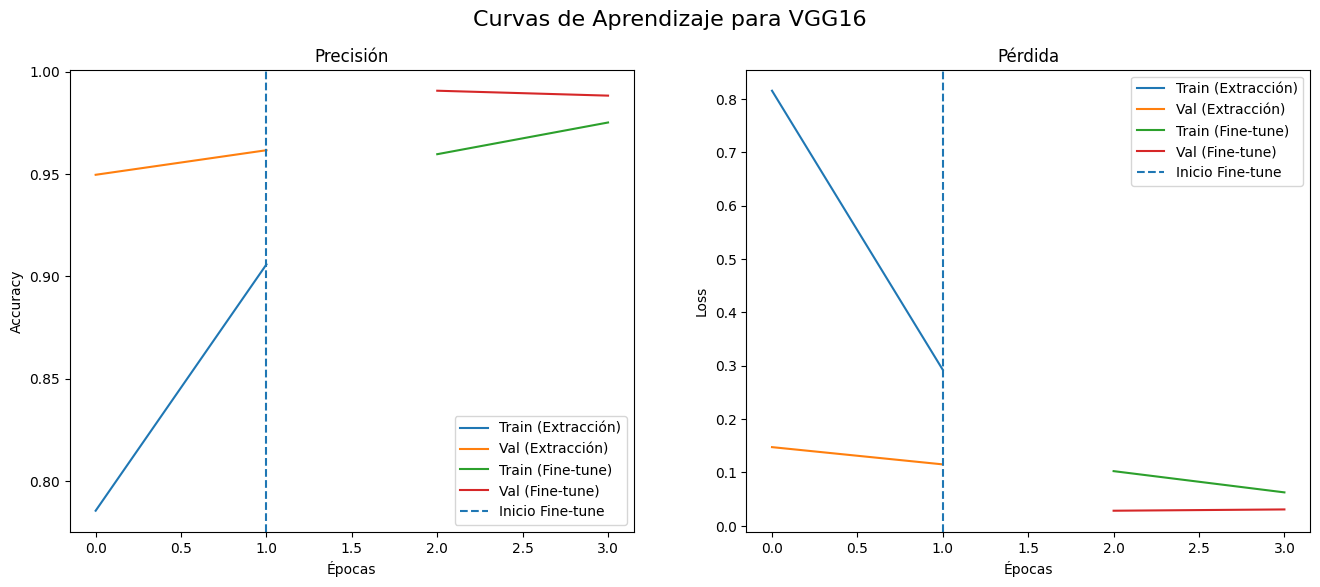


--- Iniciando entrenamiento para: ResNet50 ---
Found 17500 images belonging to 2 classes.
Found 3750 images belonging to 2 classes.

--- Fase 1: Extracción de Características ---
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Epoch 1/2
547/547 ━━━━━━━━━━━━━━━━━━━━ 310s 539ms/step - accuracy: 0.8267 - loss: 0.3749 - val_accuracy: 0.9781 - val_loss: 0.0670
Epoch 2/2
547/547 ━━━━━━━━━━━━━━━━━━━━ 283s 518ms/step - accuracy: 0.9660 - loss: 0.0961 - val_accuracy: 0.9877 - val_loss: 0.0422

--- Fase 2: Ajuste Fino ---
Epoch 1/2
547/547 ━━━━━━━━━━━━━━━━━━━━ 325s 554ms/step - accuracy: 0.9624 - loss: 0.0989 - val_accuracy: 0.9915 - val_loss: 0.0223
Epoch 2/2
547/547 ━━━━━━━━━━━━━━━━━━━━ 288s 527ms/step - accuracy: 0.9772 - loss: 0.0598 - val_accuracy: 0.9904 - val_loss: 0.0232
--- Entrenamiento para ResNet50 completado. ---


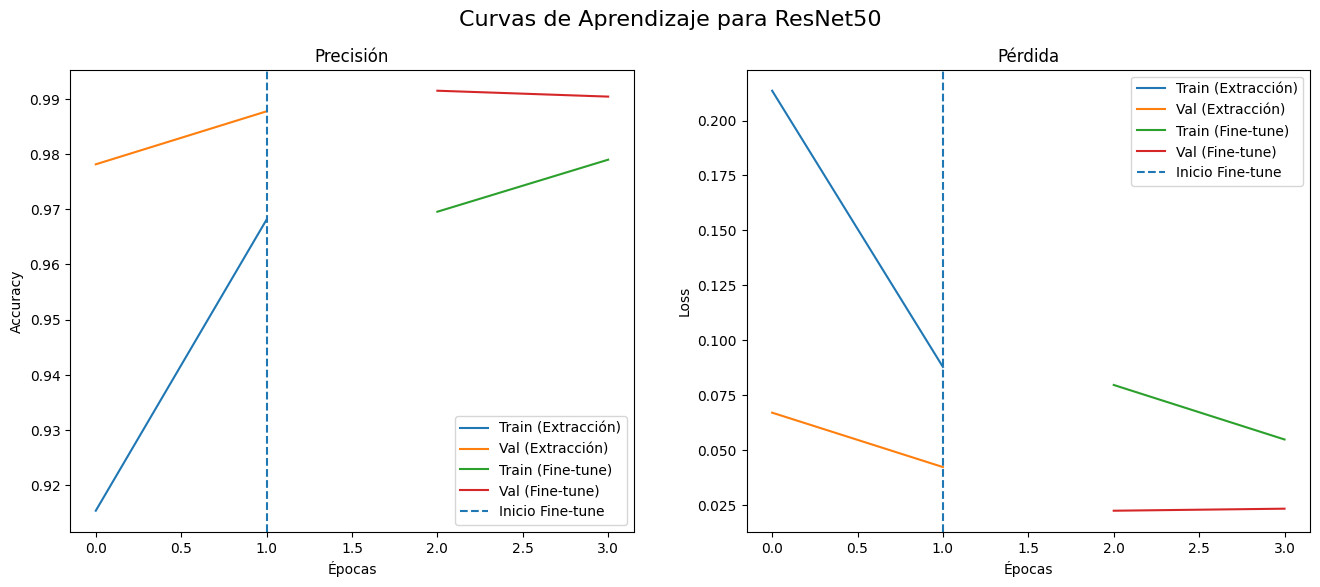


--- Iniciando entrenamiento para: Xception ---
Found 17500 images belonging to 2 classes.
Found 3750 images belonging to 2 classes.

--- Fase 1: Extracción de Características ---
83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Epoch 1/2
547/547 ━━━━━━━━━━━━━━━━━━━━ 350s 596ms/step - accuracy: 0.9257 - loss: 0.2848 - val_accuracy: 0.9877 - val_loss: 0.0583
Epoch 2/2
547/547 ━━━━━━━━━━━━━━━━━━━━ 290s 530ms/step - accuracy: 0.9704 - loss: 0.0958 - val_accuracy: 0.9888 - val_loss: 0.0410

--- Fase 2: Ajuste Fino ---
Epoch 1/2
547/547 ━━━━━━━━━━━━━━━━━━━━ 347s 595ms/step - accuracy: 0.9074 - loss: 0.2474 - val_accuracy: 0.9891 - val_loss: 0.0342
Epoch 2/2
547/547 ━━━━━━━━━━━━━━━━━━━━ 312s 571ms/step - accuracy: 0.9697 - loss: 0.0803 - val_accuracy: 0.9899 - val_loss: 0.0271
--- Entrenamiento para Xception completado. ---


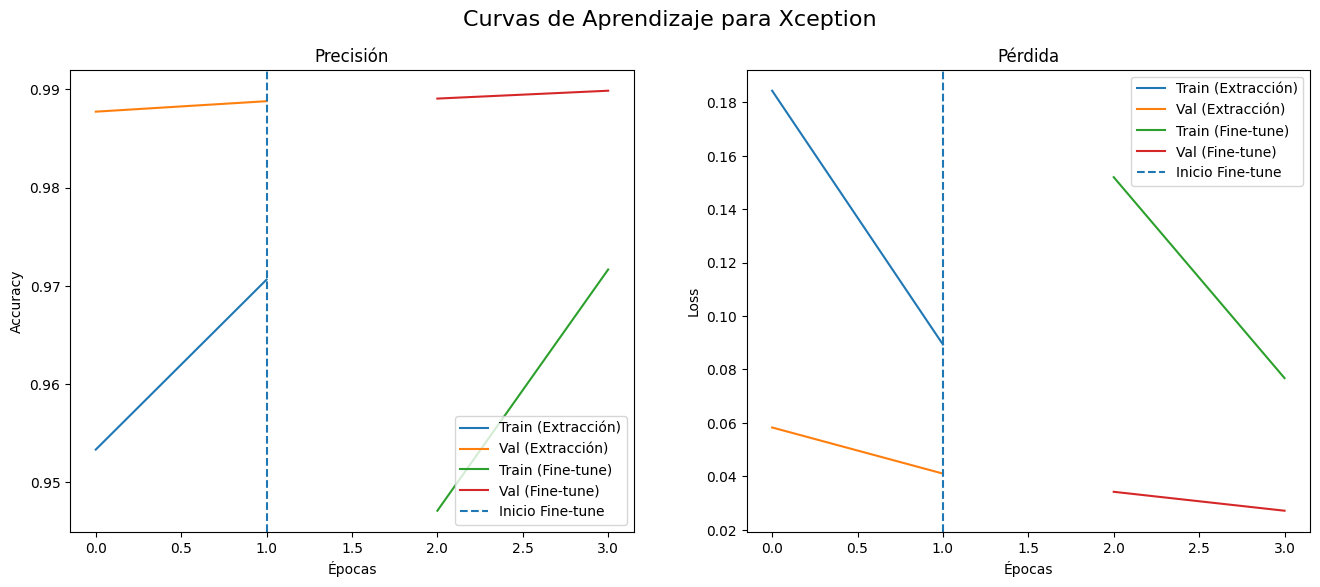


--- Evaluación Final en el Conjunto de Prueba ---

Evaluando VGG16...
Found 3750 images belonging to 2 classes.
118/118 ━━━━━━━━━━━━━━━━━━━━ 19s 155ms/step - accuracy: 0.9909 - loss: 0.0292

Evaluando ResNet50...
Found 3750 images belonging to 2 classes.
118/118 ━━━━━━━━━━━━━━━━━━━━ 12s 103ms/step - accuracy: 0.9820 - loss: 0.0454

Evaluando Xception...
Found 3750 images belonging to 2 classes.
118/118 ━━━━━━━━━━━━━━━━━━━━ 14s 121ms/step - accuracy: 0.9903 - loss: 0.0338

--- Resumen de la Comparación Final ---
Modelo: VGG16      | Precisión Final: 98.45% | Pérdida: 0.0368
Modelo: ResNet50   | Precisión Final: 98.59% | Pérdida: 0.0331
Modelo: Xception   | Precisión Final: 98.99% | Pérdida: 0.0307


In [ ]:
# Celda 5: Código completo para la Estrategia 2 (corregido)
# ==============================================================================
# SECCIÓN 1: IMPORTACIÓN DE DEPENDENCIAS
# ==============================================================================
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.applications import VGG16, ResNet50, Xception
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

# ==============================================================================
# SECCIÓN 2: CONFIGURACIÓN DE PARÁMETROS
# ==============================================================================
TRAIN_DIR = 'data_structured/train'
VALIDATION_DIR = 'data_structured/validation'
TEST_DIR = 'data_structured/test'

IMG_HEIGHT, IMG_WIDTH = 224, 224   # recomendado para VGG/ResNet; Xception acepta >=71
BATCH_SIZE = 32
EPOCHS_FEATURE_EXTRACTION = 2 #10
EPOCHS_FINE_TUNING = 2 #10

BASE_FOLDER = "/content/drive/MyDrive/Proyecto_Redes_Neuronales/"
os.makedirs(BASE_FOLDER, exist_ok=True)

# ==============================================================================
# SECCIÓN 3: FUNCIÓN AUXILIAR PARA GRAFICAR
# ==============================================================================
def plot_history(history_extraction, history_fine_tune, model_name):
    plt.figure(figsize=(16, 6))
    plt.suptitle(f'Curvas de Aprendizaje para {model_name}', fontsize=16)

    # Precisión
    plt.subplot(1, 2, 1)
    plt.plot(history_extraction.history['accuracy'], label='Train (Extracción)')
    plt.plot(history_extraction.history['val_accuracy'], label='Val (Extracción)')
    plt.plot(range(EPOCHS_FEATURE_EXTRACTION, EPOCHS_FEATURE_EXTRACTION + EPOCHS_FINE_TUNING),
             history_fine_tune.history['accuracy'], label='Train (Fine-tune)')
    plt.plot(range(EPOCHS_FEATURE_EXTRACTION, EPOCHS_FEATURE_EXTRACTION + EPOCHS_FINE_TUNING),
             history_fine_tune.history['val_accuracy'], label='Val (Fine-tune)')
    plt.axvline(x=EPOCHS_FEATURE_EXTRACTION - 1, linestyle='--', label='Inicio Fine-tune')
    plt.legend(loc='lower right')
    plt.title('Precisión'); plt.xlabel('Épocas'); plt.ylabel('Accuracy')

    # Pérdida
    plt.subplot(1, 2, 2)
    plt.plot(history_extraction.history['loss'], label='Train (Extracción)')
    plt.plot(history_extraction.history['val_loss'], label='Val (Extracción)')
    plt.plot(range(EPOCHS_FEATURE_EXTRACTION, EPOCHS_FEATURE_EXTRACTION + EPOCHS_FINE_TUNING),
             history_fine_tune.history['loss'], label='Train (Fine-tune)')
    plt.plot(range(EPOCHS_FEATURE_EXTRACTION, EPOCHS_FEATURE_EXTRACTION + EPOCHS_FINE_TUNING),
             history_fine_tune.history['val_loss'], label='Val (Fine-tune)')
    plt.axvline(x=EPOCHS_FEATURE_EXTRACTION - 1, linestyle='--', label='Inicio Fine-tune')
    plt.legend(loc='upper right')
    plt.title('Pérdida'); plt.xlabel('Épocas'); plt.ylabel('Loss')
    plt.show()

# ==============================================================================
# SECCIÓN 4: FUNCIÓN PRINCIPAL DE ENTRENAMIENTO
# ==============================================================================
def build_model(base_model, input_shape):
    inputs = keras.Input(shape=input_shape)
    x = base_model(inputs, training=False)                  # congelado en extracción
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.2)(x)
    outputs = layers.Dense(1, activation='sigmoid')(x)      # binario: cat vs dog
    model = keras.Model(inputs, outputs)
    return model

def train_transfer_model(base_model_class, preprocess_input_func, model_name,
                         input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)):
    print(f"\n{'='*60}\n--- Iniciando entrenamiento para: {model_name} ---\n{'='*60}")

    # Generadores
    train_datagen = ImageDataGenerator(
        preprocessing_function=preprocess_input_func,
        rotation_range=40, width_shift_range=0.2, height_shift_range=0.2,
        shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest'
    )
    validation_datagen = ImageDataGenerator(preprocessing_function=preprocess_input_func)

    # target_size=(alto, ancho)
    train_generator = train_datagen.flow_from_directory(
        TRAIN_DIR, target_size=(input_shape[0], input_shape[1]),
        batch_size=BATCH_SIZE, class_mode='binary'
    )
    validation_generator = validation_datagen.flow_from_directory(
        VALIDATION_DIR, target_size=(input_shape[0], input_shape[1]),
        batch_size=BATCH_SIZE, class_mode='binary'
    )

    # Fase 1: Extracción de características
    print("\n--- Fase 1: Extracción de Características ---")
    base_model = base_model_class(weights='imagenet', include_top=False, input_shape=input_shape)
    base_model.trainable = False
    model = build_model(base_model, input_shape)
    model.compile(optimizer=optimizers.Adam(learning_rate=2e-4),
                  loss='binary_crossentropy', metrics=['accuracy'])
    history_extraction = model.fit(
        train_generator, epochs=EPOCHS_FEATURE_EXTRACTION,
        validation_data=validation_generator
    )

    # Fase 2: Fine-tuning (descongelar últimas capas)
    print("\n--- Fase 2: Ajuste Fino ---")
    base_model.trainable = True
    fine_tune_at = max(0, len(base_model.layers) - 30)
    for layer in base_model.layers[:fine_tune_at]:
        layer.trainable = False

    model.compile(optimizer=optimizers.Adam(learning_rate=1e-5),
                  loss='binary_crossentropy', metrics=['accuracy'])
    history_fine_tune = model.fit(
        train_generator, epochs=EPOCHS_FINE_TUNING,
        validation_data=validation_generator
    )

    print(f"--- Entrenamiento para {model_name} completado. ---")
    return model, history_extraction, history_fine_tune

# ==============================================================================
# SECCIÓN 5: ENTRENAR CADA ARQUITECTURA
# ==============================================================================
results = {}
architectures = {
    "VGG16":   (VGG16,   tf.keras.applications.vgg16.preprocess_input),
    "ResNet50":(ResNet50,tf.keras.applications.resnet50.preprocess_input),
    "Xception":(Xception,tf.keras.applications.xception.preprocess_input),
}

for name, (model_class, preprocess_func) in architectures.items():
    model, hist_ext, hist_ft = train_transfer_model(model_class, preprocess_func, name)
    results[name] = {'model': model}
    plot_history(hist_ext, hist_ft, name)
    model.save(os.path.join(BASE_FOLDER, f"{name.lower()}_model.h5"))

# ==============================================================================
# SECCIÓN 6: EVALUACIÓN EN TEST Y COMPARACIÓN
# ==============================================================================
print(f"\n{'='*60}\n--- Evaluación Final en el Conjunto de Prueba ---\n{'='*60}")

for name, data in results.items():
    print(f"\nEvaluando {name}...")
    preprocess_func = architectures[name][1]  # <- corregido (índice 1, no 3)
    test_datagen = ImageDataGenerator(preprocessing_function=preprocess_func)
    test_generator = test_datagen.flow_from_directory(
        TEST_DIR, target_size=(IMG_HEIGHT, IMG_WIDTH),
        batch_size=BATCH_SIZE, class_mode='binary', shuffle=False
    )
    loss, accuracy = data['model'].evaluate(test_generator)
    results[name]['test_accuracy'] = accuracy
    results[name]['test_loss'] = loss

print(f"\n{'='*60}\n--- Resumen de la Comparación Final ---\n{'='*60}")
for name, data in results.items():
    print(f"Modelo: {name:<10} | Precisión Final: {data['test_accuracy']*100:.2f}% | Pérdida: {data['test_loss']:.4f}")
